In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import src.BPS_SFH as BPS_SFH

In [2]:
msp_data_list = []  # List to hold all MSP data rows

msp = 0
with open('evolution_data_SSP.txt', 'r') as file:
    for line in file:
        # Split line into entries
        entries = line.strip().split(',')
        
        # Check if this line indicates a new MSP
        if len(entries) == 2:
            # Save B and i for the current MSP
            current_B = float(entries[0])
            current_i = float(entries[1])
            msp += 1
        elif len(entries) == 7:
            # Create a flat dictionary for the time step and append it to the list
            time_step_data = {
                'num' : msp,
                'B': current_B,
                'i': current_i,
                'time': float(entries[0]),
                'period': float(entries[1]),
                'period_derivative': float(entries[2]),
                'ns_mass': float(entries[3]),
                'secondary_mass': float(entries[4]),
                'secondary_type': entries[5],
                'orbital_separation': float(entries[6])
            }
            msp_data_list.append(time_step_data)
msp_df = pd.DataFrame(msp_data_list)

In [3]:
len(msp_df.B.unique())

1391

In [4]:
msp_df.num.unique()

array([   1,    2,    3, ..., 9192, 9193, 9194])

Text(0, 0.5, 'SFR')

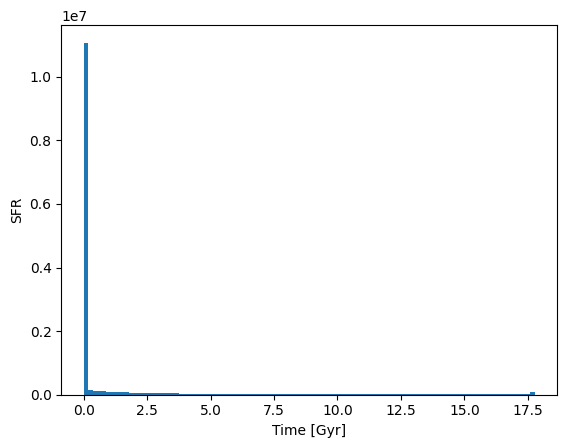

In [37]:
# x = BPS_SFH.sample_birth_times(dt=1e5, t_end=14e9, M_sim=2e9, length=1000*len(msp_df.num.unique()), bulge_or_disk='Bulge')
x = BPS_SFH.calculate_star_formation_rate(dt=1e3, t_end=14e9, bulge_or_disk='Bulge')
plt.hist(x, bins=100);
plt.xlabel('Time [Gyr]')
plt.ylabel('SFR')

In [139]:
choices = np.random.choice(x/1e9, len(msp_df.num.unique()))
choices

array([ 1.31497,  0.96623,  0.46224, ...,  0.84332,  0.5265 ,  0.22862])

In [140]:
msp_df2 = msp_df.copy()

for i in range(1, len(msp_df.num.unique())+1):
    msp_df2.loc[msp_df2.num == i, 'time'] += round(choices[i-1], 3)

In [141]:
msp_df2 = msp_df2.query('time < 14')

(0.0, 1000000000.0)

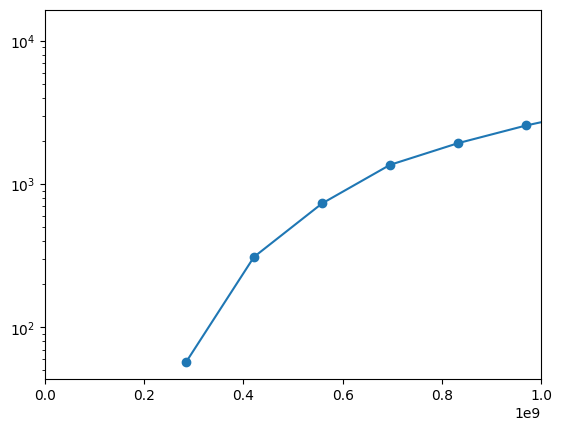

In [148]:
# plt.hist(msp_df2.time, bins=100, log=True);
hist = np.histogram(msp_df2.time, bins=100)
plt.plot(hist[1][:-1], hist[0], 'o-')
plt.yscale('log')
plt.xlim(0,1e9)

In [143]:
msp_df2['time'] = msp_df2['time']*1e9

In [144]:
msp_df2.to_csv('evolution_data_SSP_2.txt', index=False, float_format='%.3e')

In [40]:
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.cosmology import WMAP9
z = 1100 * cu.redshift
z.to(cu.with_redshift(WMAP9), u.year)

TypeError: [(Unit("redshift"), Unit("km / (Mpc s)"), <function redshift_hubble.<locals>.z_to_hubble at 0x309f24a40>, <function redshift_hubble.<locals>.hubble_to_z at 0x309f24180>), (Unit("redshift"), Unit("littleh"), <function redshift_hubble.<locals>.z_to_littleh at 0x309f24cc0>, <function redshift_hubble.<locals>.littleh_to_z at 0x309f24fe0>), (Unit("redshift"), Unit("K"), <function redshift_temperature.<locals>.z_to_Tcmb at 0x309f24d60>, <function redshift_temperature.<locals>.Tcmb_to_z at 0x309f25120>), (Unit("redshift"), Unit("Mpc"), <function redshift_distance.<locals>.z_to_distance at 0x309f25580>, <function redshift_distance.<locals>.distance_to_z at 0x309f25620>)] can not be converted to a Unit